# TODO
* Change into snake case.

# Importing and functions

## Resetting and running command line things

In [1]:
%reset -f

!pip install pandas

## Importing (standard) modules

In [2]:
# Data/vector handeling and extra math
import numpy as np
import pandas as pd

# Optimisation
import scipy
from scipy import optimize
import sklearn.metrics as metrics

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Error handeling
import warnings

# Time
import time
import datetime

# System/file interaction
import os
import pickle# https://www.pythoncentral.io/how-to-pickle-unpickle-tutorial/
import shelve# https://stackoverflow.com/questions/2960864/how-to-save-all-the-variables-in-the-current-python-session

## Importing from file

In [3]:
from helpers import *

## Defining (lambda) functions

In [4]:
exampleRealFunction = lambda x: np.exp(x)/10 + x**2 + np.sqrt(x)# https://realpython.com/python-lambda/

def thirdOrderPolynomial(x, a: float, b: float, c=2, d=1):
    """
    A third order polynomial function.
    
    This is the function that is going to be fitted with the data.
    """
    return a + b*x + c*x**2 + d*x**3

# Example of data importing, fitting, filtering and plotting

## Data importing, fitting/filtering, scatter/line plot, finding a specific data point/index

Theoretical minimum MAPE: 10.471529989737649
Fit parameters: [-0.22251583  2.20602825  0.01248317  0.22900844] with standard deviation [2.29916096 2.71085589 0.96846429 0.10692594]
RMSE =  2.2472208429547997 , MAPE = 10.273509940720068 , MAE = 1.6040313670244835 , MSE = 5.050001517010481 , R2 = 0.9580806472288381


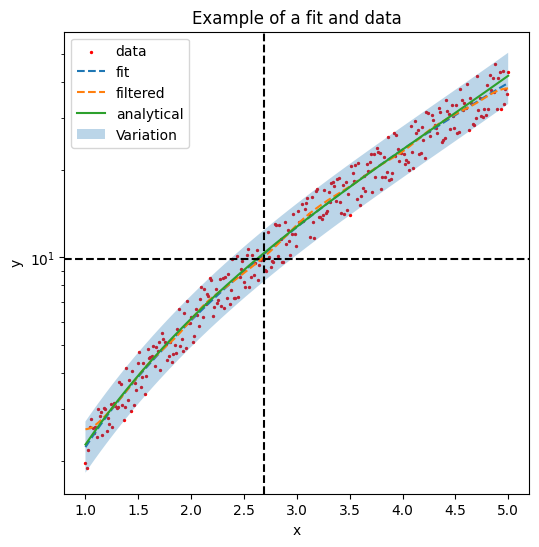

In [5]:

## Generating/getting data
### From function
amountOfDatapoints = 300
variation = 0.2

x = np.linspace(1, 5, num=amountOfDatapoints)
y = exampleRealFunction(x) * ((2 * np.random.rand(amountOfDatapoints) - 1) * variation + 1)# Add random variation to y data
print("Theoretical minimum MAPE:", 100*metrics.mean_absolute_percentage_error(y, exampleRealFunction(x)))

## Fitting data
startingParameters = [-10, 15, -5, 1]# Optional starting values of the parameters
popt, pcov = optimize.curve_fit(thirdOrderPolynomial, x, y, startingParameters)# Make the fit.

fit = thirdOrderPolynomial(x, *popt)# Get the results of the fit.
print("Fit parameters:", popt, "with standard deviation", np.sqrt(np.diag(pcov)))
print("RMSE = ", metrics.mean_squared_error(y, fit, squared=False), ", MAPE =", 100*metrics.mean_absolute_percentage_error(y, fit), ", MAE =", metrics.mean_absolute_error(y, fit), ", MSE =", metrics.mean_squared_error(y, fit), ", R2 =", metrics.r2_score(y, fit))#https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

## Filtering data
y_filter = scipy.ndimage.gaussian_filter(y, 10)# Apply a Gaussian filter (like time averaging) to smooth the curve.

x_interpolation = np.linspace(1, 5, num=5*amountOfDatapoints)
y_interpolation = np.interp(x_interpolation, x, y_filter)

## Get the index of where y=10
y_goal = 10
index = (np.abs(y_filter - y_goal)).argmin()

## Ploting data
fig, ax = plt.subplots(1, 1, figsize = (6,6))# Make a plot.
ax.scatter(x, y, label="data", s=2, marker="o", color='r')
ax.plot(x, fit, linestyle="--", label="fit")
ax.plot(x, y_filter, linestyle="--", label="filtered")
ax.plot(x, exampleRealFunction(x), label="analytical")
ax.fill_between(x, exampleRealFunction(x)*(1+variation), exampleRealFunction(x)*(1-variation), alpha=0.3, label="Variation")
ax.axvline(x[index], color="k", linestyle="--")
ax.axhline(y[index], color="k", linestyle="--")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_yscale('log')
ax.set_title("Example of a fit and data")
ax.legend()
plt.show()

## Example polynomial fitting and random data generation

Selected order: order 17 of 20 , MAPE: 25.076763270318224 , minimum MAPE: 25.076763270318224
Coefficients: [-1.01752315e+02  1.33251782e+03 -6.47214520e+03  1.60466677e+04
 -2.34202273e+04  2.18558249e+04 -1.37166306e+04  5.96058193e+03
 -1.81237350e+03  3.80518561e+02 -5.17852797e+01  3.46226266e+00
  1.83141650e-01 -7.05473591e-02  7.96904679e-03 -4.92974724e-04
  1.67448507e-05 -2.45571791e-07]


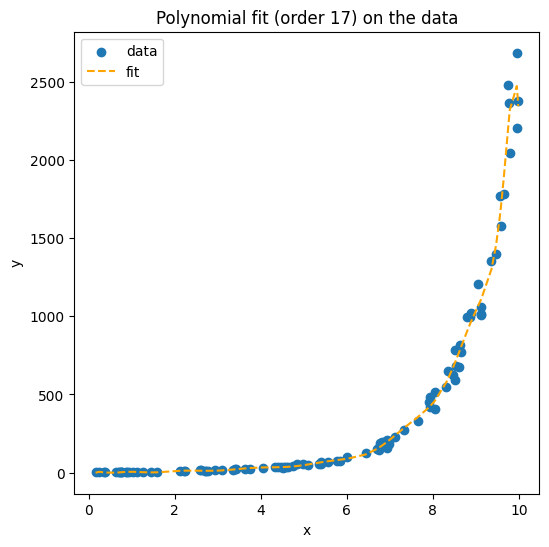

Selected order: order 4 of 4 , MAPE: 3.46199377596512 , minimum MAPE: 3.46199377596512
Coefficients: [ 0.01452728  1.01921804 -0.05361392 -0.17297915  0.02764699]


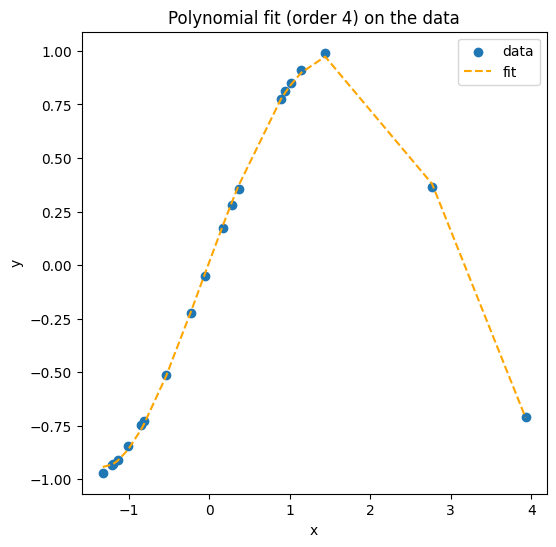

In [6]:
variation = 0.2

x = np.sort((10 * np.random.rand(100)))# 100 random points between 0 and 10
#x = np.linspace(1, 10, num=amountOfDatapoints)
y = exampleRealFunction(x) * ((2*np.random.rand(len(x))*variation + 1))# Add random variation to y data guaranteed to be in a certain range.

coefficients, MAPE = makePolynomialFit(x, y, True)

x = np.sort(np.random.normal(loc=0, scale=2, size=20))#20 random points of a Gaussian distribution with a mean of 0 and std of 2.
y = np.sin(x)
coefficients, MAPE = makePolynomialFit(x, y, True)

## Heatmap and contour plot example

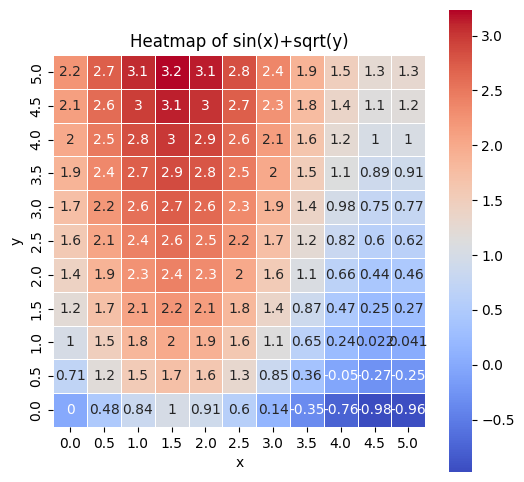

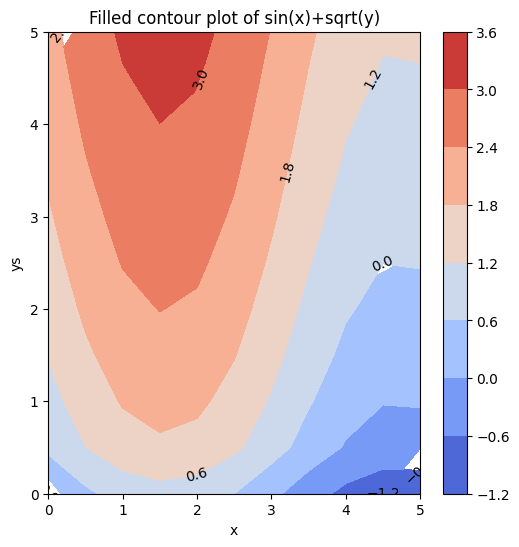

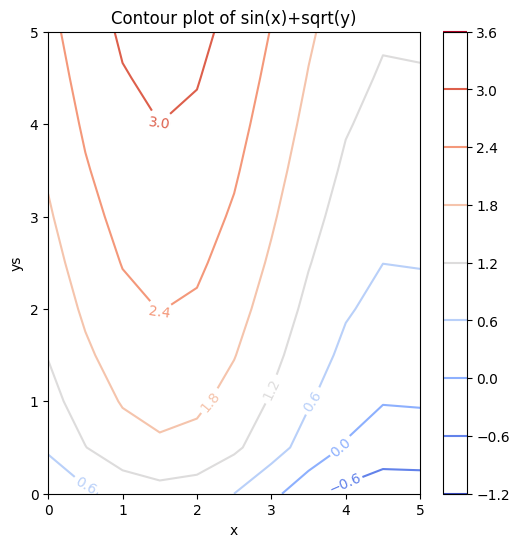

In [7]:
x = []
y = []
z = []

for i in np.linspace(0, 5, num=11):
    for j in np.linspace(0, 5, num=11):
        x.append(i)
        y.append(j)
        z.append(np.sin(i)+np.sqrt(j))

## Plotting
xGrid, yGrid, zGrid, pdDataframe = transformToGrid(x, y, z, xName="x", yName="y", zName="sin(x)+sqrt(y)")
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
sns.heatmap(pdDataframe, ax=ax, cmap="coolwarm", linewidths=.5, annot=True, square=True)
ax.invert_yaxis()
#ax.xaxis.tick_top()
ax.set_title("Heatmap of sin(x)+sqrt(y)")
plt.show()

xGrid, yGrid, zGrid, pdDataframe = transformToGrid(x, y, z, xName="x", yName="y", zName="sin(x)+sqrt(y)")
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
CS = ax.contourf(xGrid, yGrid, zGrid, cmap="coolwarm")#, levels=13)
ax.clabel(CS, fontsize=10, colors=['black' for l in CS.levels])
ax.set_title("Filled contour plot of sin(x)+sqrt(y)")
ax.set_xlabel("x")
ax.set_ylabel("ys")
fig.colorbar(CS)
plt.show()

xGrid, yGrid, zGrid, pdDataframe = transformToGrid(x, y, z, xName="x", yName="y", zName="sin(x)+sqrt(y)")
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
CS = ax.contour(xGrid, yGrid, zGrid, cmap="coolwarm")#, levels=13)
ax.clabel(CS, fontsize=10)
ax.set_title("Contour plot of sin(x)+sqrt(y)")
ax.set_xlabel("x")
ax.set_ylabel("ys")
fig.colorbar(CS)
plt.show()

## Example of online data importing, subplots and figure display/saving

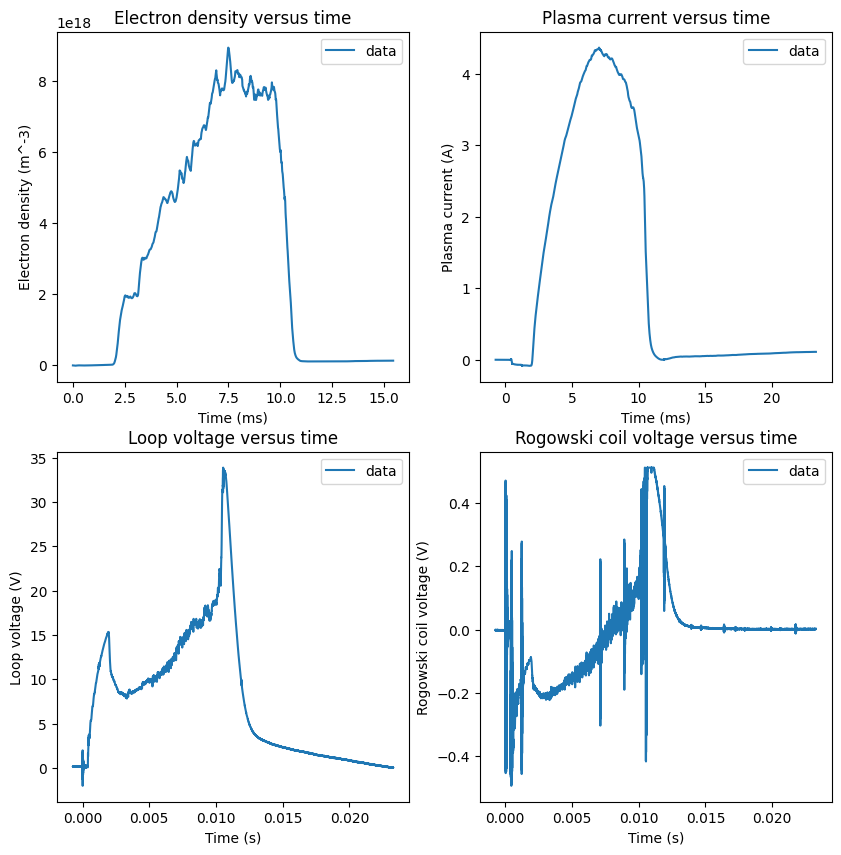

ERROR shelving: __builtin__
ERROR shelving: __builtins__
ERROR shelving: datetime
ERROR shelving: exampleRealFunction
ERROR shelving: exit
ERROR shelving: file
ERROR shelving: get_ipython
ERROR shelving: metrics
ERROR shelving: np
ERROR shelving: open
ERROR shelving: optimize
ERROR shelving: os
ERROR shelving: pd
ERROR shelving: pickle
ERROR shelving: plt
ERROR shelving: quit
ERROR shelving: scipy
ERROR shelving: shelve
ERROR shelving: sns
ERROR shelving: time
ERROR shelving: warnings


In [8]:
## Importing data
shot_no = 41299

"""import requests
t_CD = requests.get('http://golem.fjfi.cvut.cz/shots/'+str(shot_no)+'/Production/Parameters/Tcd')# Time curren drive
t_CD = float(t_CD.content) * 1e-6  # from us to s"""

### From file via numpy.
"""
data = np.genfromtxt(filename, skip_header=2, delimiter =  ",")
x = data[:,0]
y = data[:,1]#"""

### From file via pandas
"""
data = pd.read_csv("Spectrum.txt", delimiter="\t")
print(data.describe(), data.columns)
x = data[data.columns[0]]
y = data["Intensity"]#"""

### From internet pandas
ne_lav = pd.read_csv('http://golem.fjfi.cvut.cz/shots/'+str(shot_no)+'/Diagnostics/Interferometry/LukLob/ne_lav.csv', header=None)
Ip = pd.read_csv('http://golem.fjfi.cvut.cz/shots/'+str(shot_no)+'/Diagnostics/BasicDiagnostics/Basic/Results/Ip.csv', header=None)
U_Loop = pd.read_csv('http://golem.fjfi.cvut.cz/shots/'+str(shot_no)+'/Diagnostics/BasicDiagnostics/DetectPlasma/U_Loop.csv', header=None)
U_RogCoil = pd.read_csv('http://golem.fjfi.cvut.cz/shots/'+str(shot_no)+'/Diagnostics/BasicDiagnostics/DetectPlasma/U_RogCoil.csv', header=None)

## Plotting data
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2, 2, figsize = (10,10))# Make an plot with multiple subfigures

ax1.plot(ne_lav[0], ne_lav[1], label="data")
ax1.set_xlabel("Time (ms)")
ax1.set_ylabel("Electron density (m^-3)")
ax1.set_title("Electron density versus time")
ax1.legend()

ax2.plot(Ip[0], Ip[1], label="data")
ax2.set_xlabel("Time (ms)")
ax2.set_ylabel("Plasma current (A)")
ax2.set_title("Plasma current versus time")
ax2.legend()

ax3.plot(U_Loop[0], U_Loop[1], label="data")
ax3.set_xlabel("Time (s)")
ax3.set_ylabel("Loop voltage (V)")
ax3.set_title("Loop voltage versus time")
ax3.legend()

ax4.plot(U_RogCoil[0], U_RogCoil[1], label="data")
ax4.set_xlabel("Time (s)")
ax4.set_ylabel("Rogowski coil voltage (V)")
ax4.set_title("Rogowski coil voltage versus time")
ax4.legend()

plt.show()

### Saving and deleting
## Figure
fig.savefig('ExampleSubfigures.pdf', dpi=1200)# resolution = figsize*dpi#, format='eps'

## Pickle a single variable
if not os.path.isdir("temp"):
    os.makedirs("temp")

with open("temp/pickle_file.pckl", "wb") as file:#, "wb")
    pickle.dump(Ip, file)# Can only do a single file per pickle

with open("temp/pickle_file.pckl", "rb") as file:#, "wb")
    Ip=pickle.load(file)
#print(IpFromPickle)

## Shelving
myShelve = shelve.open("temp/shelve_file", "n")
for key in dir():
    try:
        myShelve[key] = globals()[key]
    except:
        # Doesn't save everything, but most variables are saved.
        print('ERROR shelving: {0}'.format(key))
myShelve.close()

my_shelf = shelve.open("temp/shelve_file")
for key in my_shelf:
    try:
        globals()[key]=my_shelf[key]
    except:
        print('(Limited) ERROR unshelving: {0}'.format(key))
my_shelf.close()

## Deleting files
os.remove('ExampleSubfigures.pdf')
os.remove("temp/pickle_file.pckl")
os.remove("temp/shelve_file.bak")
os.remove("temp/shelve_file.dat")
os.remove("temp/shelve_file.dir")
os.rmdir("temp")

# Example simulation

In [9]:
from IPython.display import clear_output

def updateProgress(progress:float, barLength=100):
    """
    Generates a progress bar and is based on the float progress which should be between 0 and 1. Taken from here: https://mikulskibartosz.name/how-to-display-a-progress-bar-in-jupyter-notebook-47bd4c2944bf
    """
    
    if isinstance(progress, int):
        progress = float(progress)
    elif not isinstance(progress, float):
        progress = 0
    elif progress < 0:
        progress = 0
    elif progress >= 1:
        progress = 1
    
    block = int(round(barLength * progress))

    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (barLength - block), progress * 100)
    print(text)

startTime = time.time()

for i in range(0,1001,50):
    time.sleep(i/2000)
    updateProgress(i/1000)

endTime = time.time()
print("Simulation took:", endTime-startTime,"seconds.")

Progress: [####################################################################################################] 100.0%
Simulation took: 5.285168647766113 seconds.


In [10]:
#TODO

# Machine learning

## Neural Network

In [11]:
import torch
torch.cuda.is_available()# Jammer ;(

#TODO

False

## Guassian procces

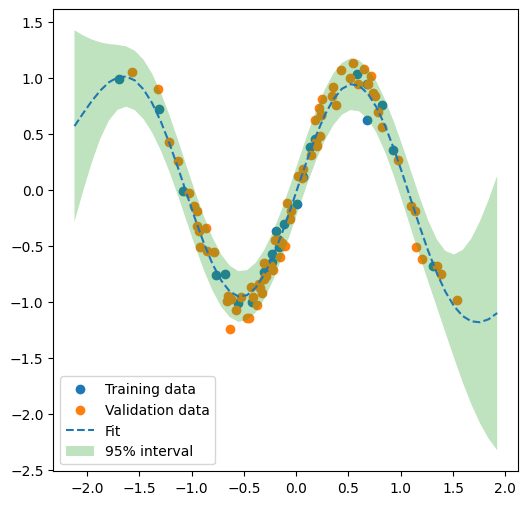

Training error: {'RMSE': 0.08741104238163554, 'MAPE': 46.21178675153455, 'MAE': 0.06947242502355053, 'MSE': 0.007640690330244083, 'R2': 0.9823109593186947}
Validation error: {'RMSE': 0.1188082010834949, 'MAPE': 22.285724499970854, 'MAE': 0.09534610925028775, 'MSE': 0.014115388644696157, 'R2': 0.9723296261293777}


In [12]:
from sklearn.gaussian_process import GaussianProcessRegressor# https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, Matern, RationalQuadratic, ExpSineSquared
from sklearn.model_selection import train_test_split

N = 100
noise = 0.1
f0 = lambda x: np.sin(3*x)
x = np.random.normal(loc=0, scale=0.8, size=N)
y = f0(x) + noise*np.random.normal(loc=0,scale=0.9,size=x.shape)


ker = RBF(length_scale=1) + WhiteKernel(noise_level=1.0)#, Matern, RationalQuadratic, ExpSineSquared
regressor, training_error, validation_error = make_Gaussian_proccess_model(x, y, kernel=ker, validation_fraction=0.75, make_plot=True)

#ker = ExpSineSquared(length_scale=1) + WhiteKernel(noise_level=1.0)
#regressor, training_error, validation_error = make_Gaussian_proccess_model(x, y, kernel=ker, validation_fraction=0.75, make_plot=True)

#ker = ExpSineSquared() + RBF() + WhiteKernel()
#regressor, training_error, validation_error = make_Gaussian_proccess_model(x, y, kernel=ker, validation_fraction=0.75, make_plot=True)
